---
# Space Syntax analysis in Python

## 1. Basic functionality
---

This document is a Python-translated version of an R workshop that presented a workflow for working with spatial data common to the space syntax field. The workshop also introduced participants to the rdepthmap package by Petros Koutsolampros, Fani Kostourou and Kimon Krenz. It aimed to make participants familiar with 1) importing spatial data for urban and building scale, 2) running space syntax analysis with the rdepthmap package and 3) managing and plotting these and other related datasets.

This is a [Python (Jupyter)](https://jupyter.org/) Notebook. When you execute code within the notebook, the results appear beneath the code. While the typical purpose of such documents is to produce reports, this document serves mainly as a relatively visual guide through the code.

This document, as a Python document, has a few differences to the R document. While R has many data-analysis tools already embedded, in Python we need to call upon the **Pandas** library (among others) to give us similar functionality. This is because Python was conceived as a more general programming language while R as an analysis-specific language. This document demonstrates how to use Python/Pandas as an analysis language; for more general use there are multiple tutorials online.

There are three parts to this:
- Basic functionality such as data.frames, plotting, making histograms etc.
- Spatial data and four of its forms:
  - Points (SpatialPointsDataFrame), typically used for observations data such as counts
  - Lines (SpatialPointsDataFrame), as the usual axial/segment networks used in space syntax
  - Polygons (SpatialPointsDataFrame), as plots of land or areas and rooms in buildings
  - Pixels (SpatialPointsDataFrame), equivalent to the GIS Raster, as used in Visibility Graph Analysis
- The rdepthmap package 

Code is only "run" within code chunks. Other chunks (like this text) can instead by interpreted as Markdown Text (a simple annotation format).
Given that the aim of this document is to allow for reproducable workflows, all results and graphs should be created when all the chunks are run in order.

Text that starts with hash (#) is considered "comment" code and will not be read by Python
The numbers on the left are increased as each chunk is executed. **They are NOT the number of the chunk**

---
As mentioned above, we first have to load some libraries to enable core analysis and plotting

In [1]:
# Load pandas, the DataFrame and data handling library and from now on refer to it as "pd"
import pandas as pd

# Load the pyplot module from the matplotlib library for plotting, refer to it as "plt"
import matplotlib.pyplot as plt

---
A Pandas DataFrame is something akin to an excel sheet, in that it contains tabular data. The next chunk reads a Comma-Separated Values (CSV) file from the data directory as a DataFrame (called "carsDF") and displays the first 5 lines. Running the below chunk will print the DataFrame underneath.

In [2]:
carsDF = pd.read_csv("data/cars.csv")
carsDF.head(5)

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


---
As this DataFrame contains only two variables, we can easily produce a simple scatter plot

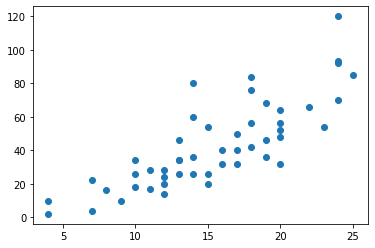

In [3]:
plt.scatter(carsDF['speed'], carsDF['dist'])

---
We can see the variable names in the cars data.frame by calling the command names()

In [4]:
carsDF.columns

Index(['speed', 'dist'], dtype='object')

---
To make a simple histogram of one of the variables use the command hist()

(array([2., 3., 4., 6., 8., 5., 7., 8., 1., 6.]),
 array([ 4. ,  6.1,  8.2, 10.3, 12.4, 14.5, 16.6, 18.7, 20.8, 22.9, 25. ]),
 <BarContainer object of 10 artists>)

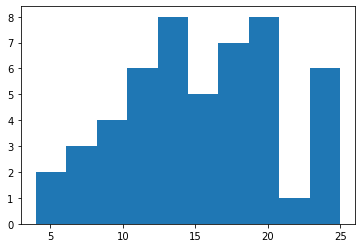

In [5]:
plt.hist(carsDF['speed'])

---
We can load a different DataFrame by going to a spreadsheet application (such as excel), creating a few data points and exporting the sheet to a CSV. Then, we can load that CSV

In [6]:
newCarsDF = pd.read_csv("data/newCars.csv")
newCarsDF.head(5)

,speed,category
0,1,A
1,2,A
2,3,B
3,4,B
4,5,A


---
Pandas realises that the imported CSV cas a numerical value and a categorical value. We can see that "speed" is an integer (int64) while "category" is an object

In [7]:
newCarsDF.dtypes

speed        int64
category    object
dtype: object

In a similar fashion, doing a histogram of one of the variables:

(array([1., 1., 1., 0., 1., 1., 0., 2., 1., 1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

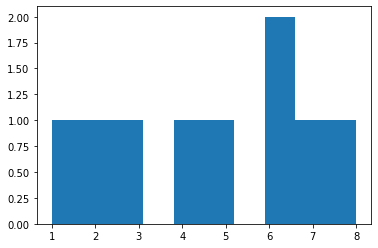

In [8]:
plt.hist(newCarsDF['speed'])